In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as pgo

import glob
# import tensorflow as tf
# tf.test.gpu_device_name()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


In [3]:
import io
data_file = pd.read_excel('idGabarito.xlsx',sheet_name = "Planilha identificadores ITSM")
df = data_file[['ID_GRUPO_DONO_SERVICO','ID_SOLICITANTE', 'ID_ANALISTA', 'ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR', 'GRUPO_SOLUCIONADOR']]

In [4]:
#Exploring data
df.head()


,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR,GRUPO_SOLUCIONADOR
0,1851,811,1034,705,732,CSMOP SISTEMICO N2
1,1851,1247,591,1851,1558,SERVICE DESK CYBERSERCURITY N1
2,1851,1346,591,1417,1554,SERVICE DESK ATOS (FSN1)
3,1851,1807,1687,1609,723,COSIP/COIMP SISTEMICO N2
4,1851,1525,583,1851,1555,SERVICE DESK ATOS (FSN2)


In [5]:
df.describe()

,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
count,67417.00000,67417.000000,67417.000000,67417.000000,67417.000000
mean,1740.08925,983.137918,882.045196,1330.632111,1190.576932
std,336.21293,524.983629,452.282687,489.573536,415.792922
min,688.00000,6.000000,132.000000,0.000000,19.000000
25%,1851.00000,608.000000,603.000000,905.000000,730.000000
50%,1851.00000,1001.000000,630.000000,1466.000000,1554.000000
75%,1851.00000,1360.000000,1082.000000,1851.000000,1557.000000
max,1851.00000,1852.000000,1851.000000,1851.000000,1851.000000


In [6]:
df1 = pd.crosstab(index = df['ID_GRUPO_SOLUCIONADOR'], columns = df['ID_SERVICO']).reset_index()
df1

ID_SERVICO,ID_GRUPO_SOLUCIONADOR,0,1,2,3,4,5,7,17,23,...,1708,1710,1766,1767,1769,1773,1815,1816,1820,1851
0,19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,671,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1562,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1818
59,1563,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16
60,1564,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,608
61,1628,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,17


In [7]:
# Definindo função para validar probabilidade de aparecer determinado analista
def probStatus(dataset, group_by):
    df1 = pd.crosstab(index = dataset[group_by], columns = dataset['ID_GRUPO_SOLUCIONADOR']).reset_index()
    df1['No'] = df1.iloc[:,1:].sum(axis =1)
    df1['Yes'] = (df1 == 0).sum(axis = 1)
    df1['probShowUp'] = (df1['Yes'] / (df1['Yes'] + df1['No'])).astype(float)
    return df1[[group_by, 'probShowUp']]


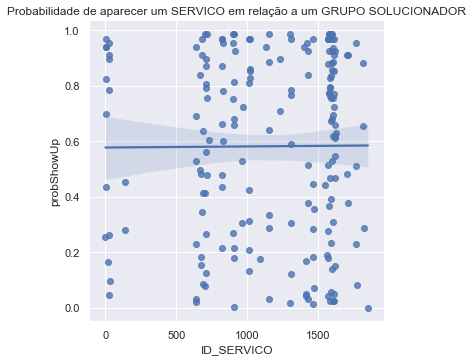

In [76]:

# Probabilidade de relação entre solicitante e analista
sns.lmplot(data = probStatus(df, 'ID_SERVICO'), x = 'ID_SERVICO', y = 'probShowUp',  fit_reg = True)
plt.xlim()
plt.title('Probabilidade de aparecer um SERVICO em relação a um GRUPO SOLUCIONADOR')
plt.show()



In [77]:
#qtde de grupos
solucionador = df.ID_GRUPO_SOLUCIONADOR.nunique()

In [78]:
#qtde de serviços
servico = df.ID_SERVICO.nunique()

In [42]:
#Agrupamento de qtde de serviço por grupo solucionador
sub_df = df.groupby(['ID_GRUPO_SOLUCIONADOR']).ID_SERVICO.nunique().reset_index().sort_values(by = 'ID_SERVICO')
sub_df.columns = ['ID_GRUPO_SOLUCIONADOR', 'QTD_SERVICO']
sub_df['ID_SERVICO'] = df['ID_SERVICO']
sub_df['GRUPO_SOLUCIONADOR'] = df['GRUPO_SOLUCIONADOR']

In [59]:
#Agrupamento de qtde de serviço por grupo solucionador
sub_df

,ID_GRUPO_SOLUCIONADOR,QTD_SERVICO,ID_SERVICO,GRUPO_SOLUCIONADOR
0,19,1,705,CSMOP SISTEMICO N2
26,727,1,1156,COENC CONTROL DESK
25,726,1,1156,COENC CONTROL DESK
34,818,1,1156,COENC CONTROL DESK
35,829,1,1156,COENC CONTROL DESK
...,...,...,...,...
54,1558,73,713,CSMOP SISTEMICO N2
51,1555,77,1582,SERVICE DESK ATOS SISTEMICO N1
50,1554,81,1582,SERVICE DESK ATOS SISTEMICO N1
10,694,82,1466,CIGEC SISTEMICO N2


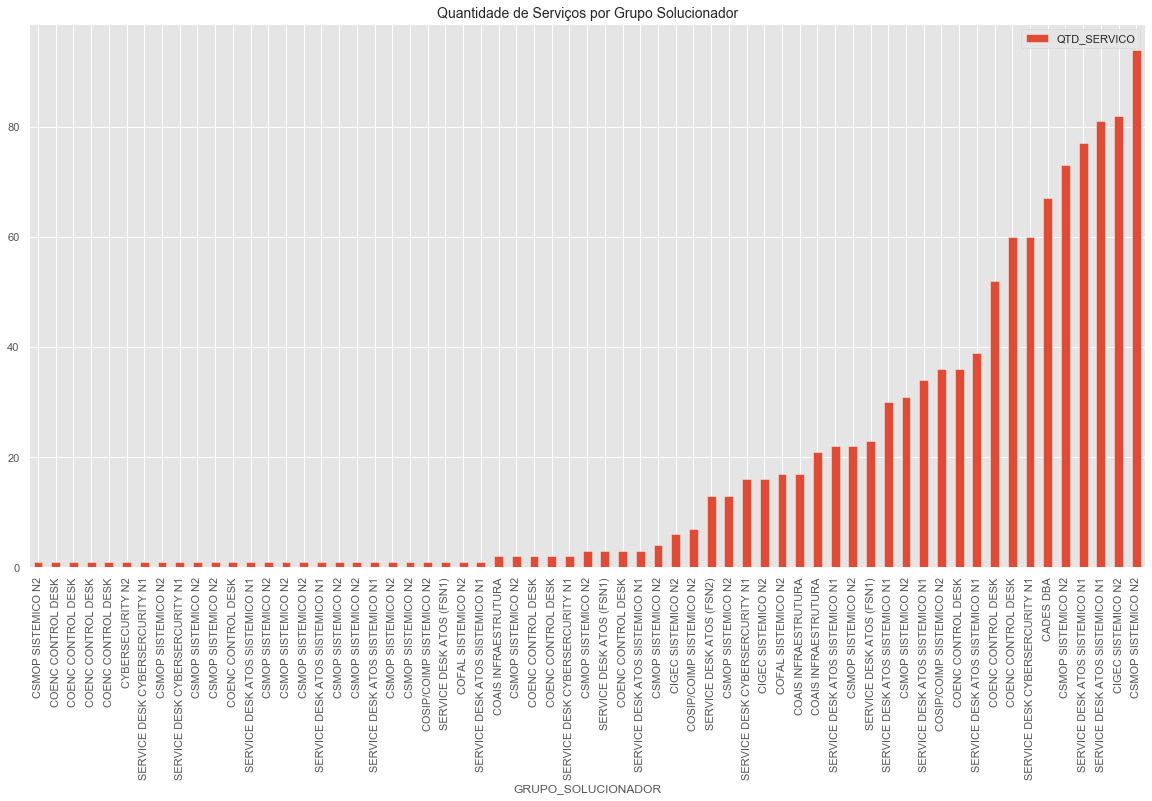

In [120]:
# plotting bar chart
ax = sub_df.plot.bar( x = 'GRUPO_SOLUCIONADOR', y = 'QTD_SERVICO', figsize= (20,10))
plt.title("Quantidade de Serviços por Grupo Solucionador", size = 14)
plt.ylim()


plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Clusterização GRUPO SOLUCIONADOR x SERVICO')

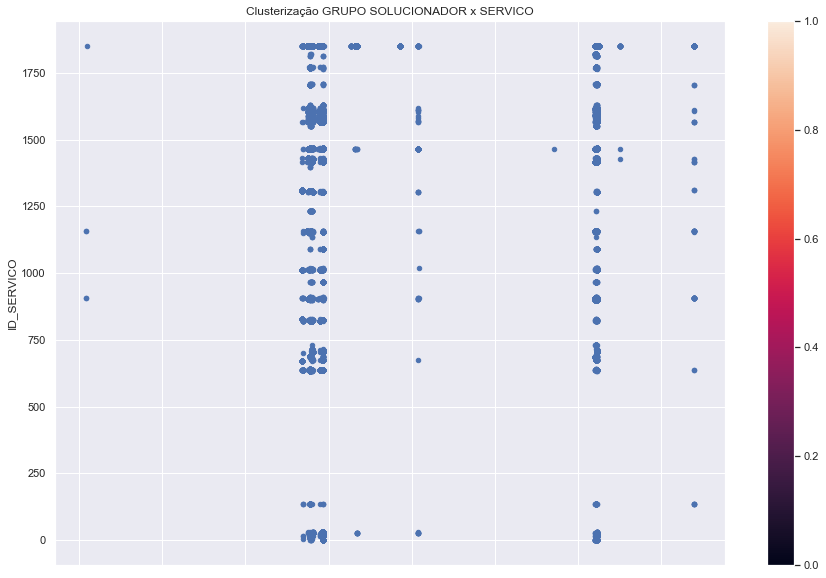

In [7]:

clusters = 2
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']].iloc[:len(df)]
df_kmeans = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SERVICO']].iloc[:len(df)]


kmeans.fit(df_kmeans)

df.plot.scatter(x='ID_GRUPO_SOLUCIONADOR', y='ID_SERVICO', colormap='viridis', figsize=(15, 10))
plt.title('Clusterização GRUPO SOLUCIONADOR x SERVIÇO')

Text(0.5, 1.0, 'Clusterização GRUPO SOLUCIONADOR x SERVICO')

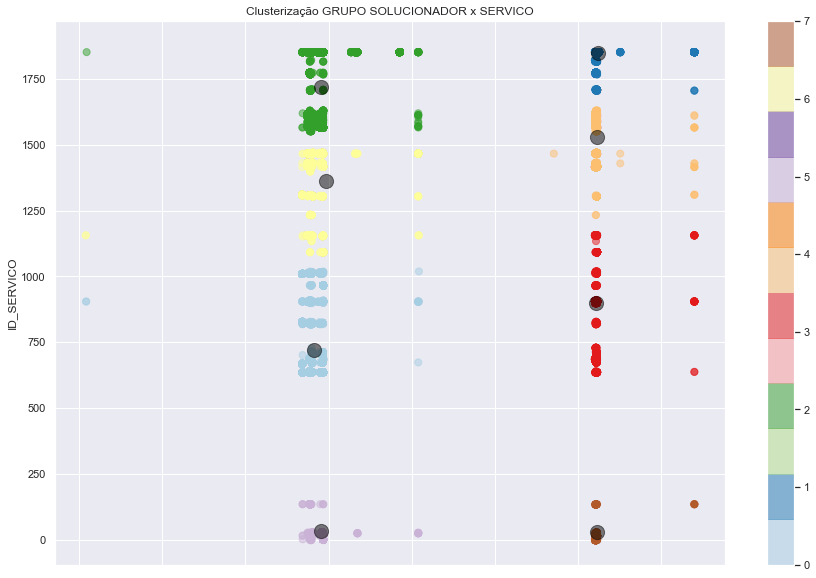

In [38]:

clusters = 8
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_GRUPO_SOLUCIONADOR', 'ID_SERVICO']].iloc[:len(df)]


model = kmeans.fit(df_kmeans)
y_pred = kmeans.predict(df_kmeans) #predicting labels (y) and saving to y_pred 
centers = kmeans.cluster_centers_ #cluster centers as determined by the k-means estimator

#ploting cluster
df.plot.scatter(x='ID_GRUPO_SOLUCIONADOR', y='ID_SERVICO',c=y_pred, cmap=plt.cm.Paired, figsize=(15, 10), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Clusterização GRUPO SOLUCIONADOR x SERVIÇO')



In [39]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
df_cluster = df[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']].values
df_cluster
# cluster.fit_predict(df_cluster)

# plt.figure(figsize=(10, 7))
# plt.scatter(df_cluster.ID_GRUPO_SOLUCIONADOR, df_cluster.ID_SERVICO, c=cluster.labels_, cmap='rainbow')


array([[ 705,  732],
       [1851, 1558],
       [1417, 1554],
       ...,
       [1851, 1851],
       [ 638,  699],
       [ 713,  732]], dtype=int64)